In [62]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # exploring and understand data using stattistical graphs
import matplotlib.pyplot as plt

In [63]:
fanc = pd.read_csv("data/Financial.csv")

In [64]:
fanc.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [65]:
fanc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [66]:
# missing values

fanc.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [67]:
fanc.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [68]:
#duplicates in DataFrame

fanc.duplicated().sum()

0

In [69]:
# Checking the summary statistics to understand the data and detect any noticable anomalies
fanc.describe().round(0).astype(int)

,year,household_size,Respondent Age
count,23524,23496,23490
mean,2017,4,39
std,1,2,17
min,2016,0,16
25%,2016,2,26
50%,2017,3,35
75%,2018,5,49
max,2056,21,100


Text(0.5, 1.0, 'Box Plot of Household Size')

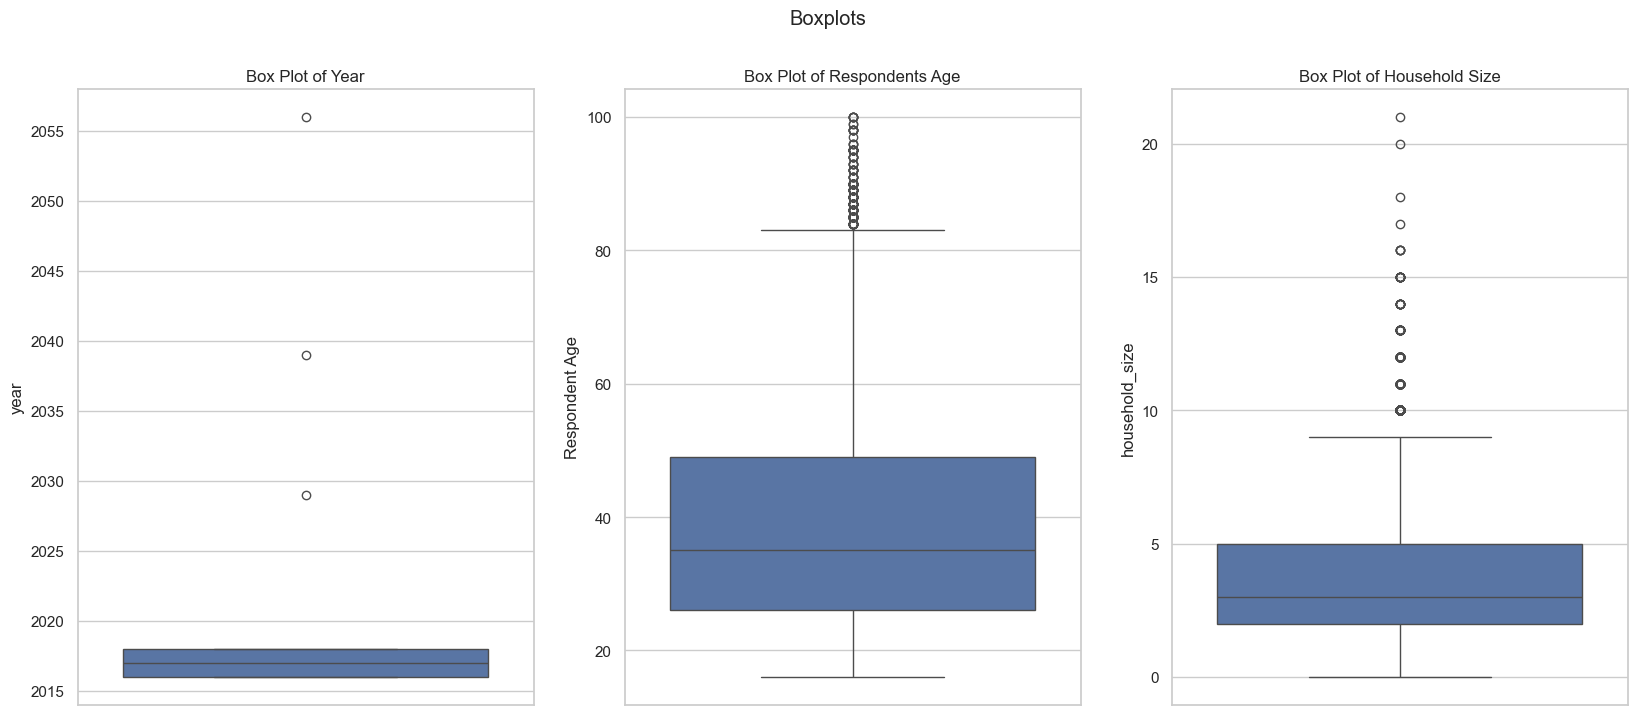

In [70]:
# Checking for outliers

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=fanc, y ='year', ax=ax[0])
ax[0].set_title('Box Plot of Year')
sns.boxplot(data=fanc, y ='Respondent Age', ax=ax[1])
ax[1].set_title('Box Plot of Respondents Age')
sns.boxplot(data=fanc, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')

In [71]:
# checking nulls before removing
fanc.isna().sum().sum()

267

In [73]:
# dropping rows with null values in any of their values

fanc = fanc.dropna()

In [74]:
# checking to confirm removal of null values

fanc.isna().sum().sum()

0

In [75]:
# setting all columns names to be in lowercase and replce spaces with _ underscore

cols = fanc.columns.tolist()
for col in range(len(cols)):
  cols[col] = cols[col].lower().replace(" ", "_")

fanc.columns = cols

# previewing dataframe
fanc.head()

# This results in column names being formatted to be in lowercase and words separated with _ underscore

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [76]:
# Before removal:

outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(fanc['year'])

[2029, 2056, 2039]

In [77]:
#Removing outliers in year column using interqurtile range
for x in ['year']:
    q75,q25 = np.percentile(fanc.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    fanc.loc[fanc[x] < min,x] = np.nan
    fanc.loc[fanc[x] > max,x] = np.nan

In [78]:
# Confirming removal of outliers

outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(fanc['year'])

[]

In [79]:
# creating DataFrame kenya for Kenyan values only
kenya = fanc[fanc['country']=='Kenya']
# previewing kenya DataFrame

kenya.head(5)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018.0,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018.0,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018.0,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018.0,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018.0,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [80]:
# creating DataFrame uganda for Ugandan values only
uganda = fanc[fanc['country']=='Uganda']

# previewing uganda DataFrame
uganda.head(5)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
21423,Uganda,2018.0,uniqueid_1,No,Rural,No,5.0,32.0,Female,Head of Household,Divorced/Seperated,Primary education,Other Income
21424,Uganda,2018.0,uniqueid_2,No,Urban,Yes,8.0,65.0,Female,Head of Household,Widowed,Secondary education,Self employed
21425,Uganda,2018.0,uniqueid_3,No,Rural,No,7.0,35.0,Female,Spouse,Married/Living together,Primary education,Self employed
21426,Uganda,2018.0,uniqueid_4,No,Rural,No,3.0,25.0,Female,Spouse,Married/Living together,Primary education,Other Income
21427,Uganda,2018.0,uniqueid_5,No,Urban,Yes,9.0,18.0,Female,Parent,Single/Never Married,Secondary education,Other Income


In [81]:
# creating DataFrame tanzania for Tanzanian values only
tanzania = fanc[fanc['country']=='Tanzania']

# previewing tanzania DataFrame
tanzania.head(5)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
14803,Tanzania,2017.0,uniqueid_1,No,Rural,Yes,1.0,22.0,Female,Child,Divorced/Seperated,Secondary education,No Income
14804,Tanzania,2017.0,uniqueid_2,No,Urban,No,2.0,100.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
14805,Tanzania,2017.0,uniqueid_3,No,Urban,Yes,3.0,19.0,Female,Head of Household,Widowed,No formal education,No Income
14806,Tanzania,2017.0,uniqueid_4,No,Urban,No,4.0,21.0,Female,Parent,Single/Never Married,Primary education,Remittance Dependent
14807,Tanzania,2017.0,uniqueid_5,Yes,Urban,Yes,3.0,24.0,Female,Parent,Divorced/Seperated,Tertiary education,Formally employed Private


In [82]:
# creating DataFrame rwanda for Rwandan values only
rwanda = fanc[fanc['country']=='Rwanda']

# previewing rwanda DataFrame
rwanda.head(5)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
6068,Rwanda,2016.0,uniqueid_1,No,Urban,Yes,7.0,18.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6069,Rwanda,2016.0,uniqueid_2,Yes,Urban,Yes,4.0,26.0,Female,Spouse,Married/Living together,Secondary education,Self employed
6070,Rwanda,2016.0,uniqueid_3,No,Rural,No,6.0,42.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
6071,Rwanda,2016.0,uniqueid_4,Yes,Urban,Yes,1.0,41.0,Male,Head of Household,Single/Never Married,Tertiary education,Informally employed
6072,Rwanda,2016.0,uniqueid_5,No,Rural,No,4.0,17.0,Female,Child,Single/Never Married,Primary education,Informally employed


In [83]:
# setting figure size
sns.set(rc={'figure.figsize':(20,12)})

# setting figure style
sns.set_style("whitegrid")

# Load the tips dataset
tip = sns.load_dataset("tips")

[Text(0.5, 1.0, 'Distribution among countries')]

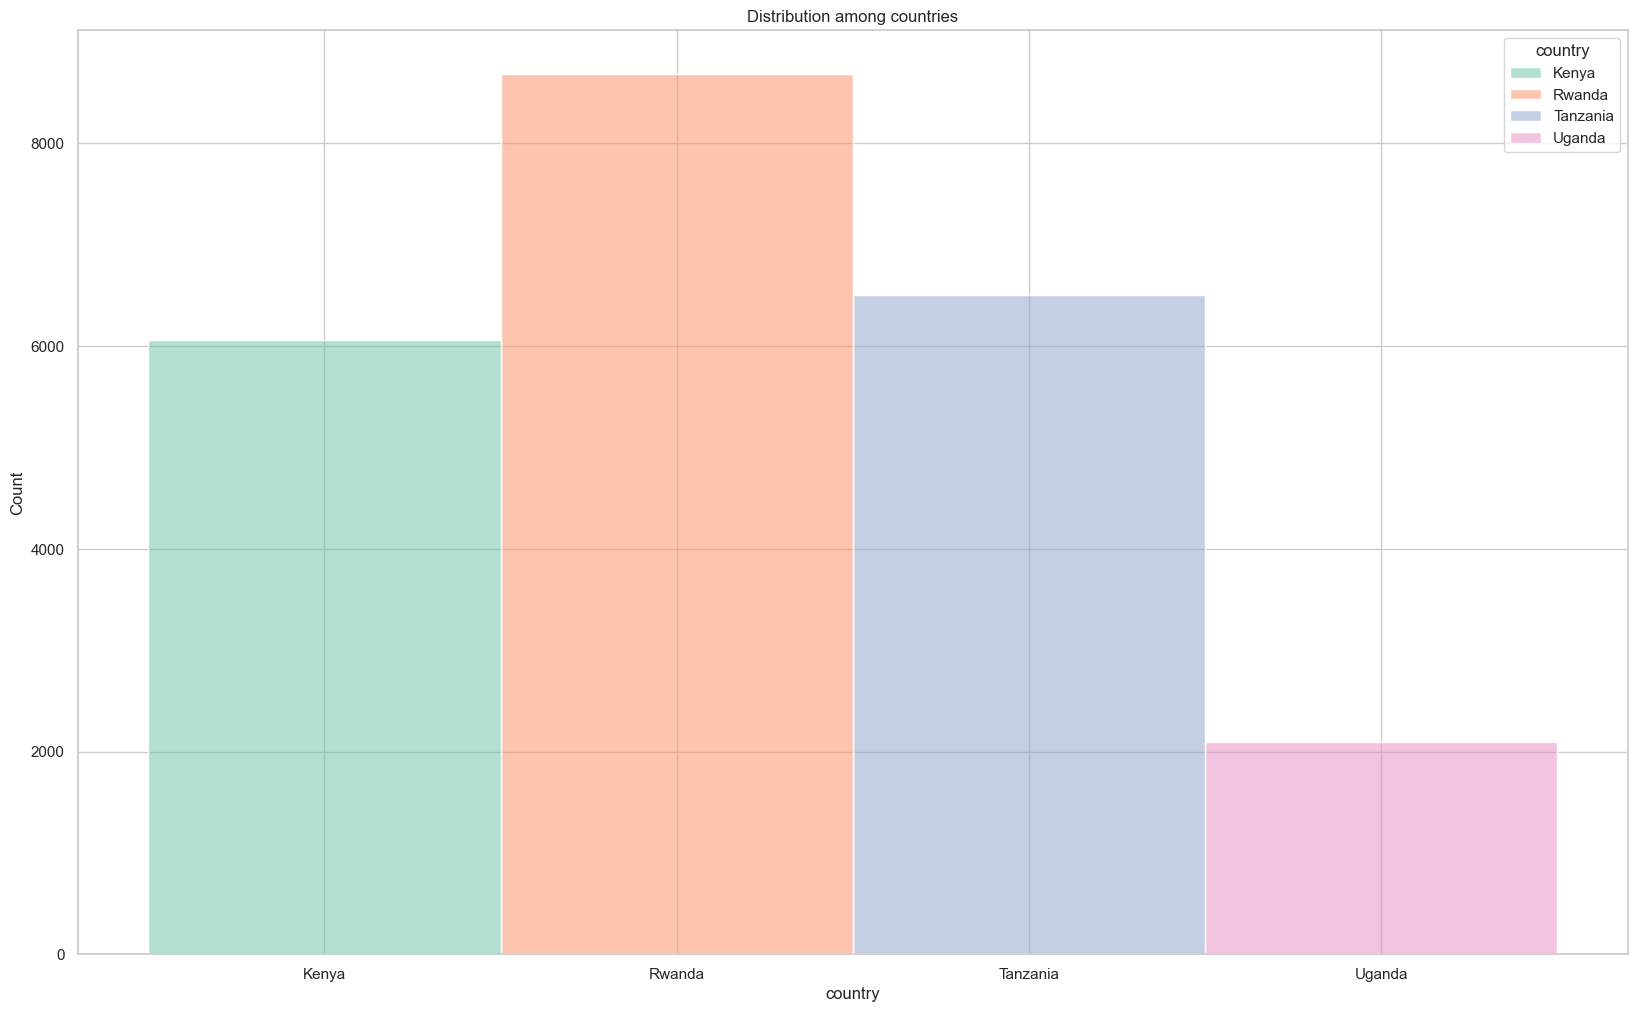

In [84]:
sns.histplot(data=fanc, x='country', hue='country', palette = "Set2").set(title='Distribution among countries')

[Text(0.5, 1.0, 'CELL PHONE ACCESS IN EAST AFRICA')]

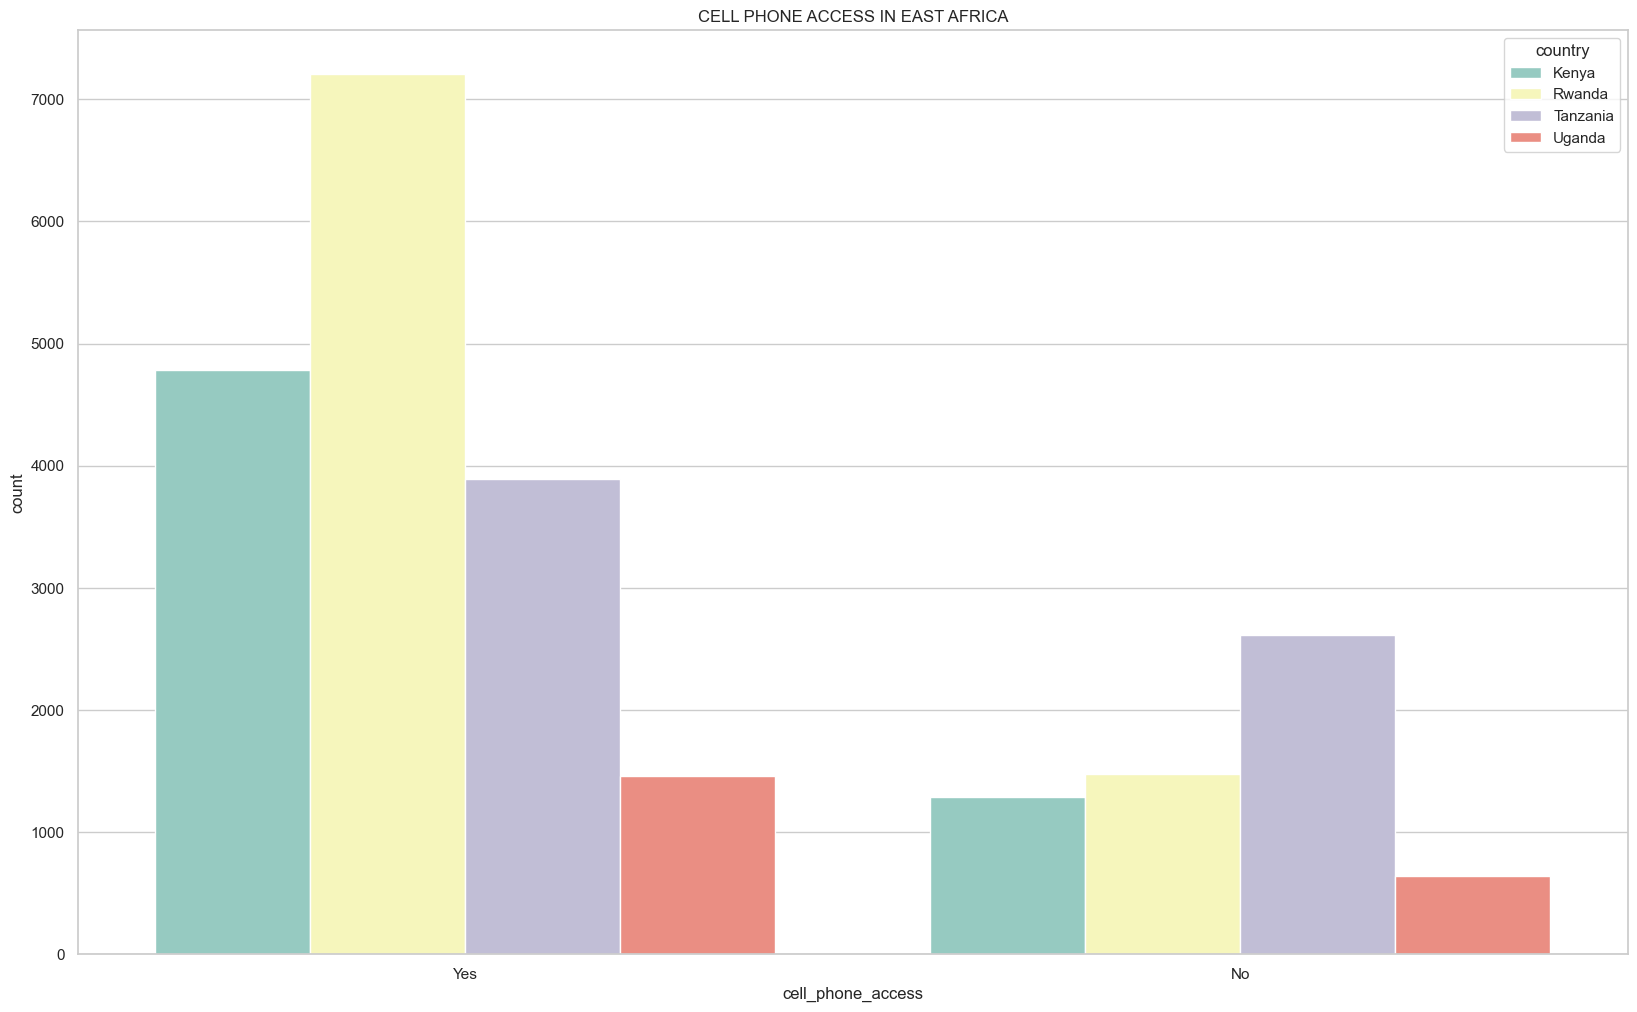

In [86]:
sns.countplot(data=fanc, x='cell_phone_access', hue = 'country', palette = "Set3").set(title='CELL PHONE ACCESS IN EAST AFRICA')

In [87]:
# Understanding statistical values for househousehold size in Kenya

# Mode
m_hh_k = kenya["household_size"].mode().round(0).astype(int).item()
print('mode', "      ", m_hh_k)

# Min, Max, Median and Percentiles
hh_k = kenya['household_size'].describe().round(0).astype(int)
print(hh_k)

mode        1
count    6064
mean        4
std         2
min         1
25%         2
50%         4
75%         5
max        21
Name: household_size, dtype: int32


In [88]:
# Understanding statistical values for househousehold size in Uganda

# Mode
m_hh_k = uganda["household_size"].mode().round(0).astype(int).item()
print('mode', "      ", m_hh_k)

# Min, Max, Median and Percentiles
hh_k = uganda['household_size'].describe().round(0).astype(int)
print(hh_k)

mode        3
count    2095
mean        5
std         3
min         1
25%         3
50%         5
75%         7
max        20
Name: household_size, dtype: int32


In [89]:
# Understanding statistical values for househousehold size in Tanzania

# Mode
m_hh_k = tanzania["household_size"].mode().round(0).astype(int).item()
print('mode', "      ", m_hh_k)

# Min, Max, Median and Percentiles
hh_k = tanzania['household_size'].describe().round(0).astype(int)
print(hh_k)

mode        2
count    6500
mean        2
std         1
min         0
25%         1
50%         2
75%         2
max        11
Name: household_size, dtype: int32


In [90]:
# Understanding statistical values for househousehold size in Rwandese

# Mode
m_hh_k = rwanda["household_size"].mode().round(0).astype(int).item()
print('mode', "      ", m_hh_k)

# Min, Max, Median and Percentiles
hh_k = rwanda['household_size'].describe().round(0).astype(int)
print(hh_k)

mode        4
count    8684
mean        4
std         2
min         1
25%         3
50%         4
75%         6
max        13
Name: household_size, dtype: int32


[Text(0.5, 1.0, 'RESPONDENTS AGE')]

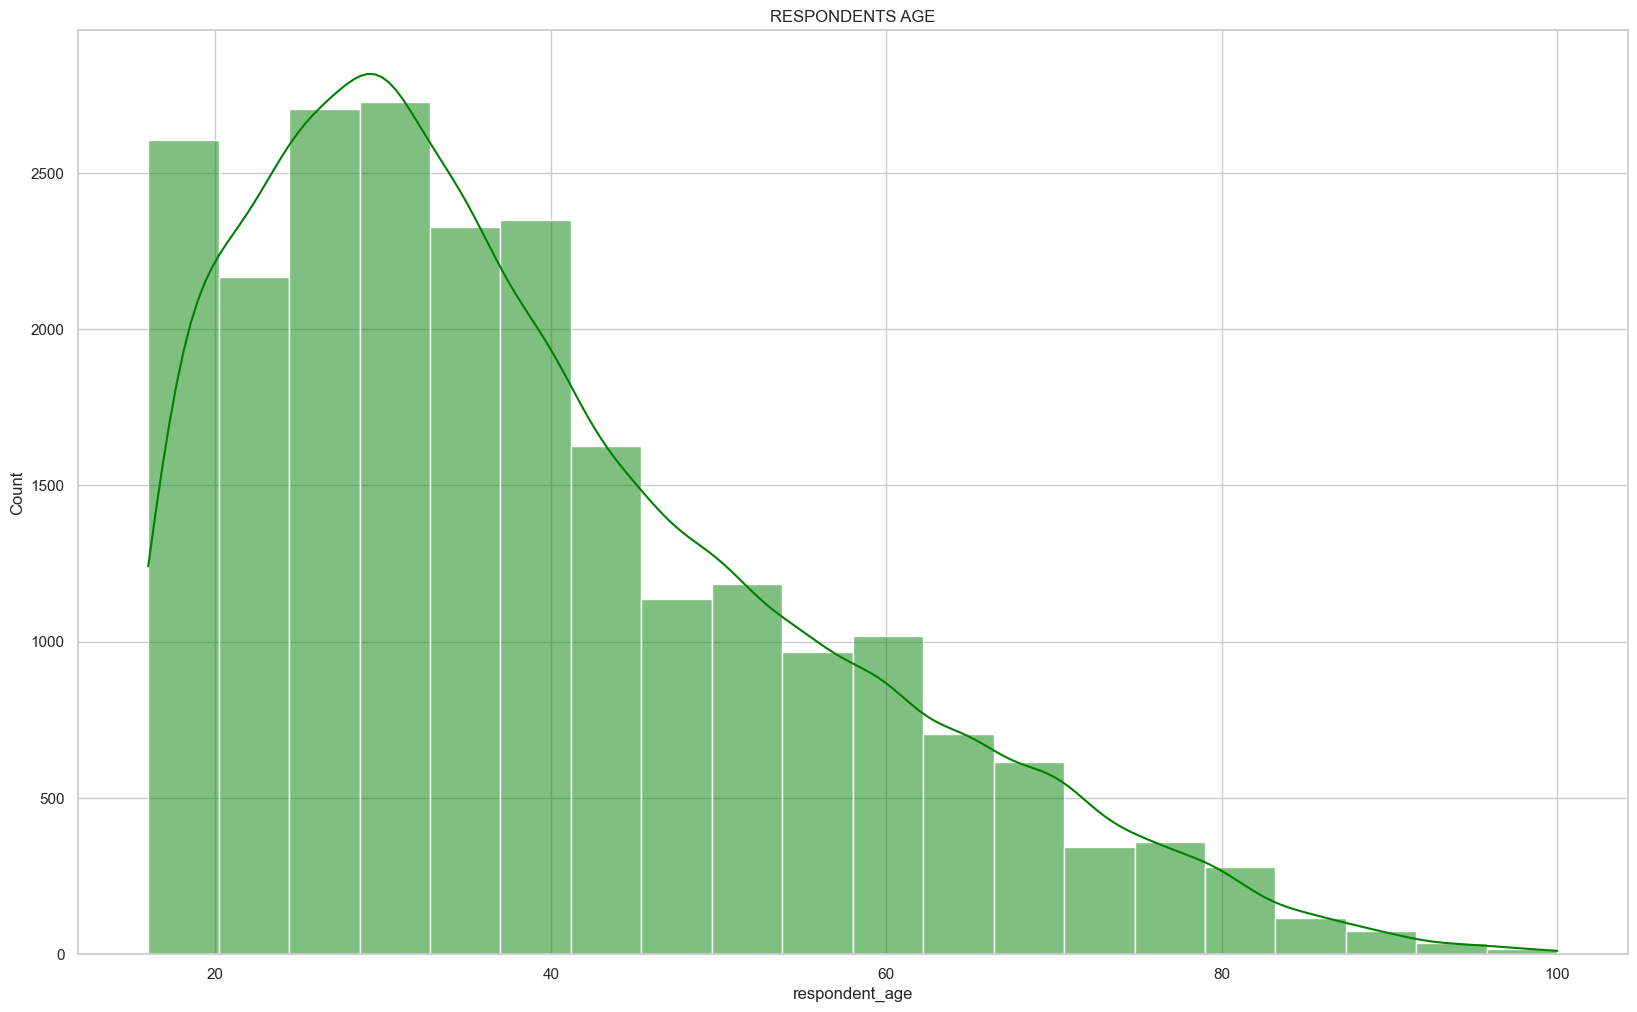

In [92]:
sns.histplot(data = fanc, x = 'respondent_age', bins = 20, kde = 'True', color = 'Green').set(title = 'RESPONDENTS AGE')

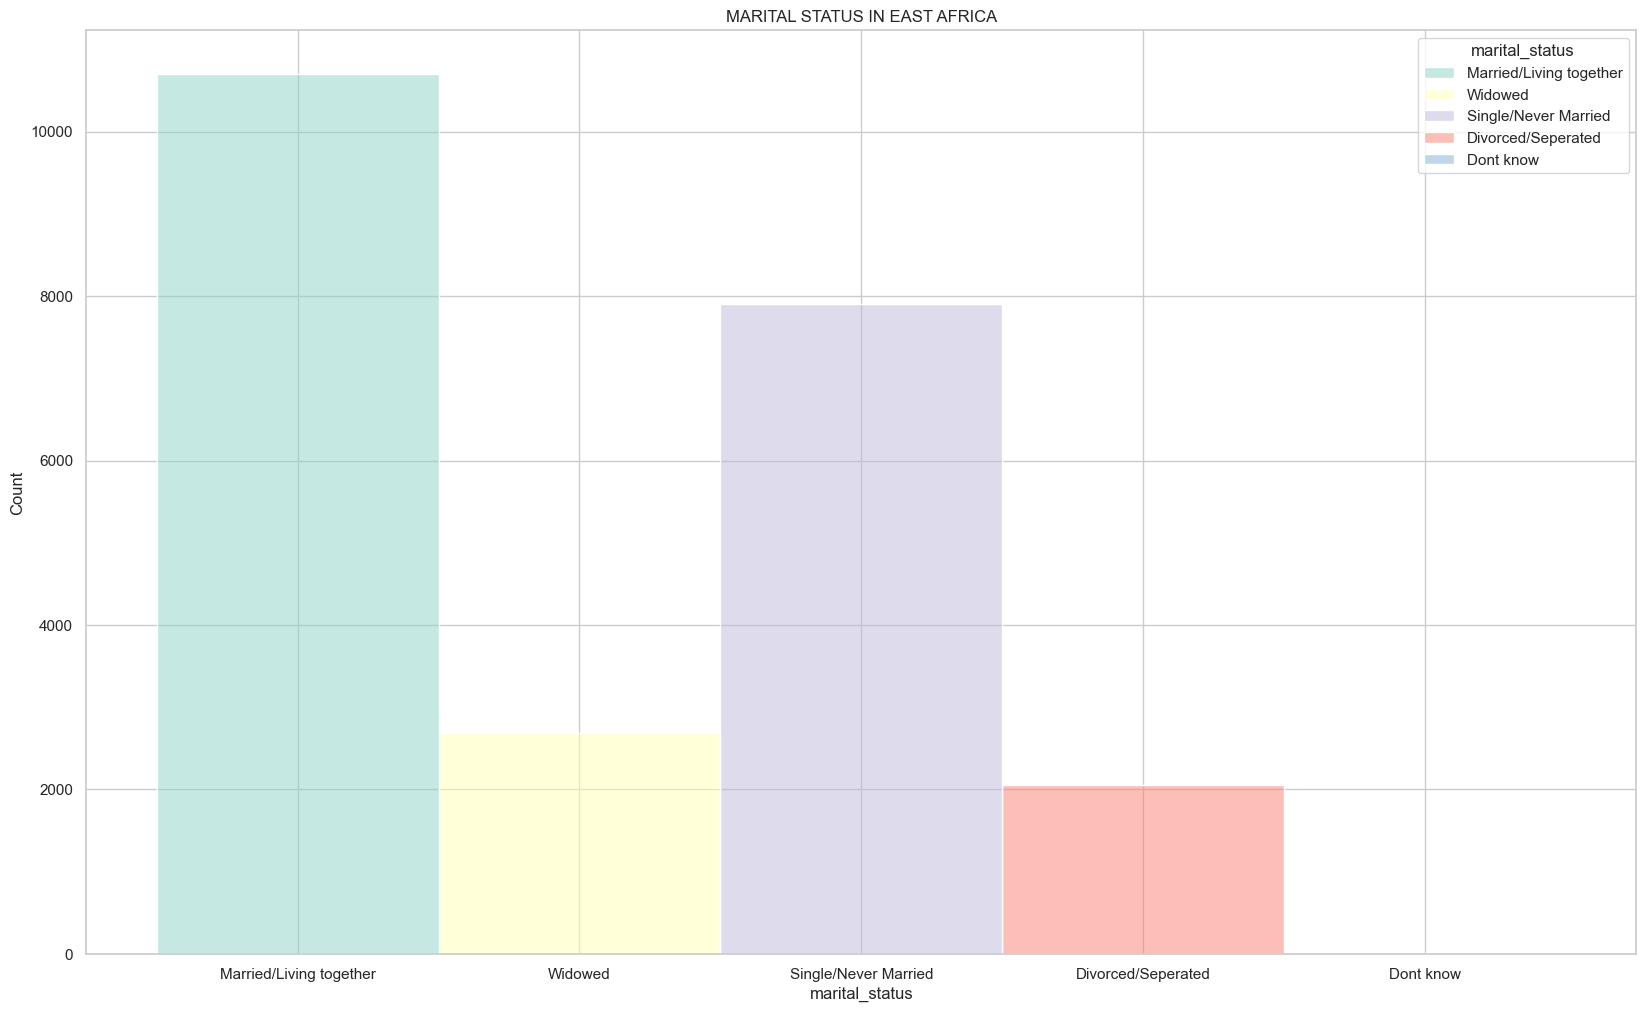

In [93]:
# sns.displot(data = fd, x= fd['marital_status'].value_counts().values,)

sns.histplot(data=fanc, x='marital_status', hue = 'marital_status', palette = "Set3").set(title='MARITAL STATUS IN EAST AFRICA');

[Text(0.5, 1.0, 'EDUCATION LEVELS')]

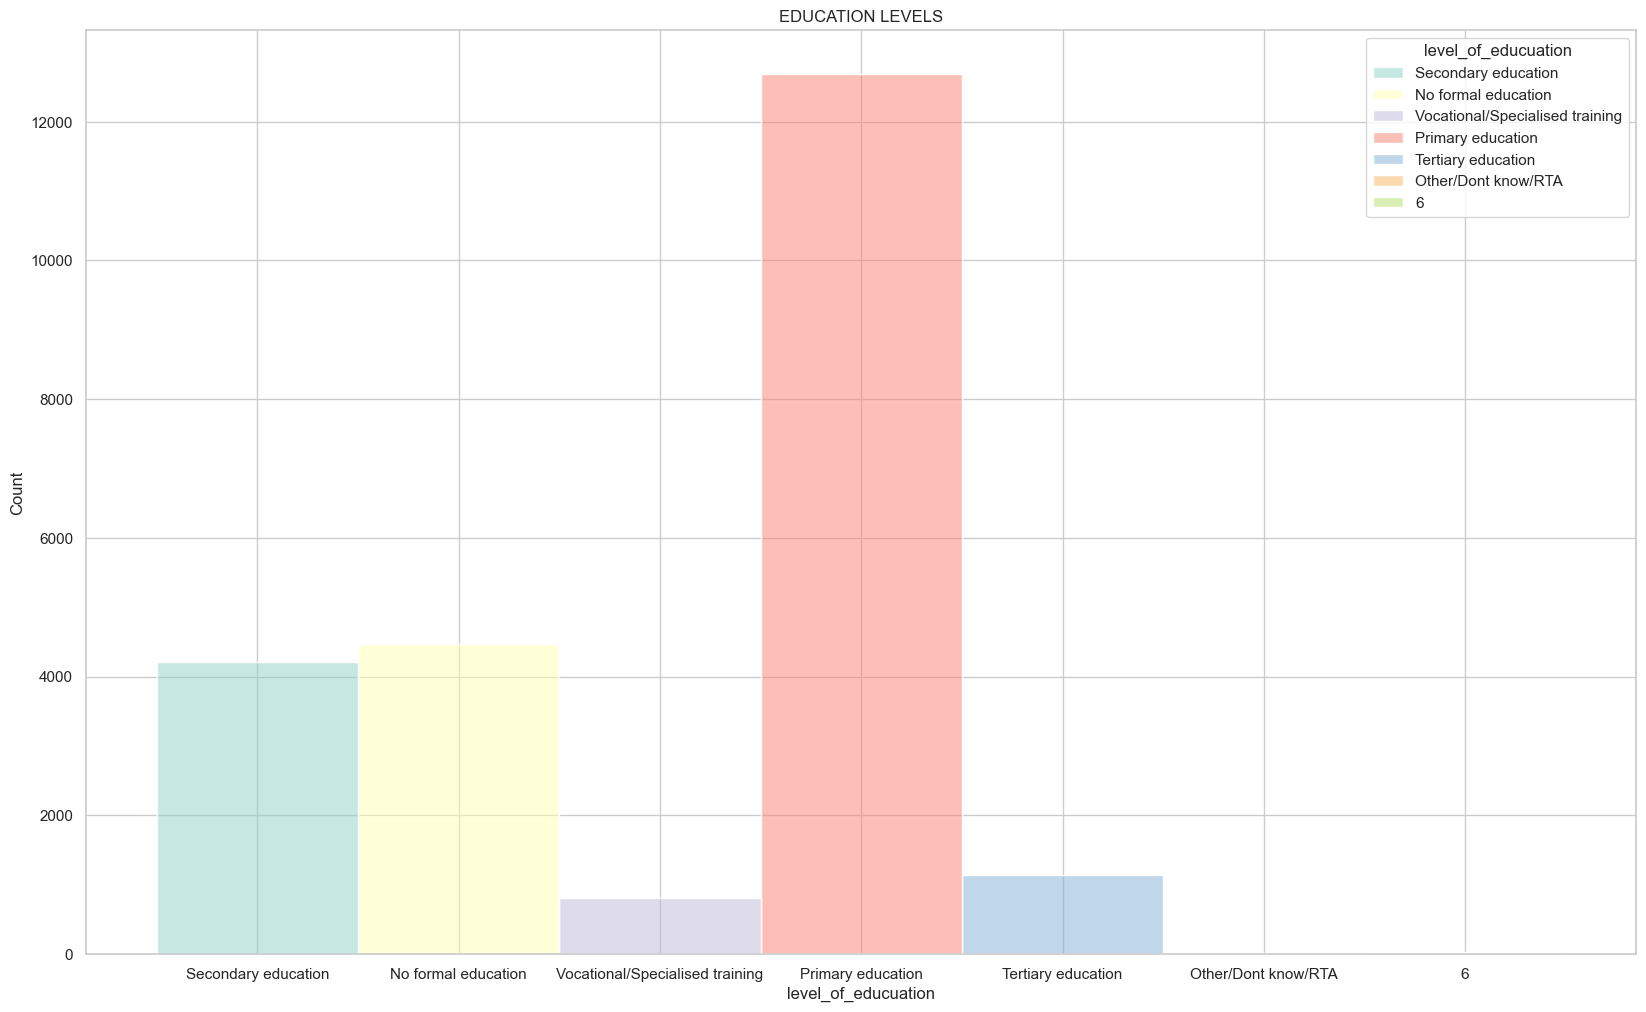

In [96]:
sns.histplot(data = fanc, x = 'level_of_educuation', hue = 'level_of_educuation', palette = 'Set3').set(title = 'EDUCATION LEVELS')

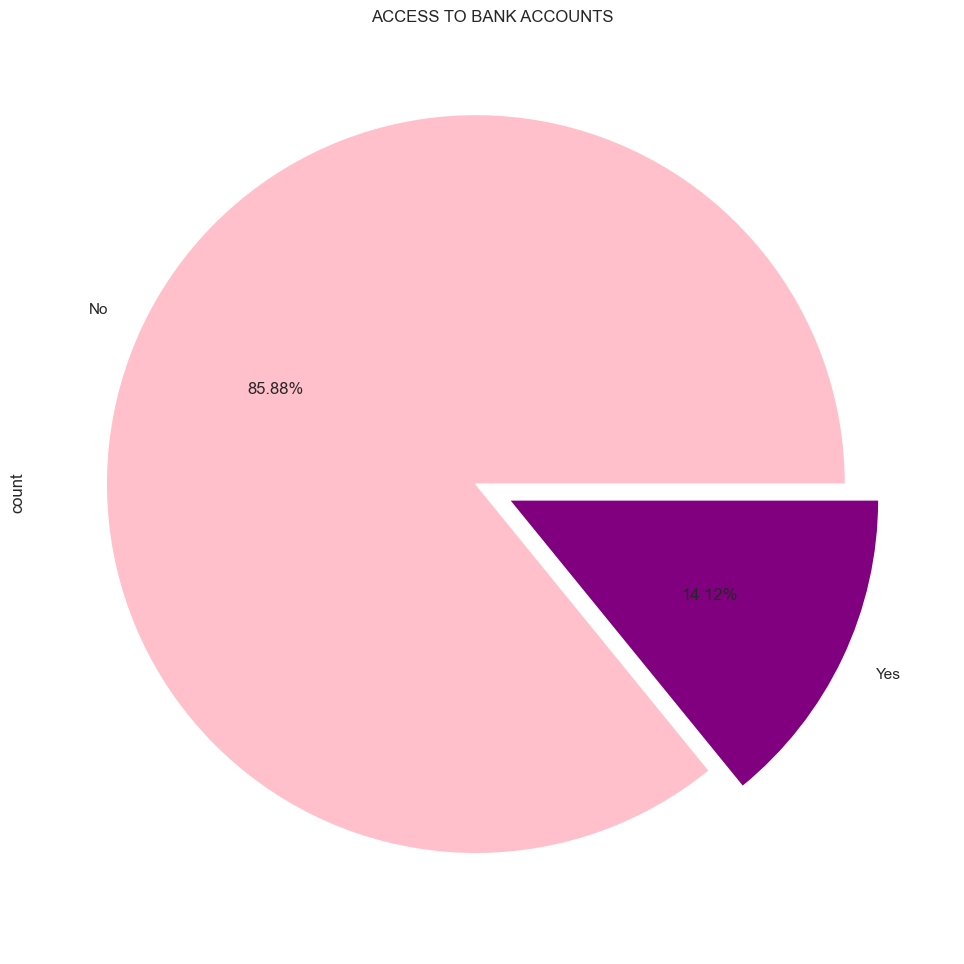

In [98]:
# defining data
data = fanc['has_a_bank_account'].value_counts()

# plotting pie chart
data.plot.pie(autopct='%.2f%%', colors = ['pink', 'purple'], explode = (0.05, 0.05))

# define tittle
plt.title('ACCESS TO BANK ACCOUNTS')

# displaying chart
plt.show()

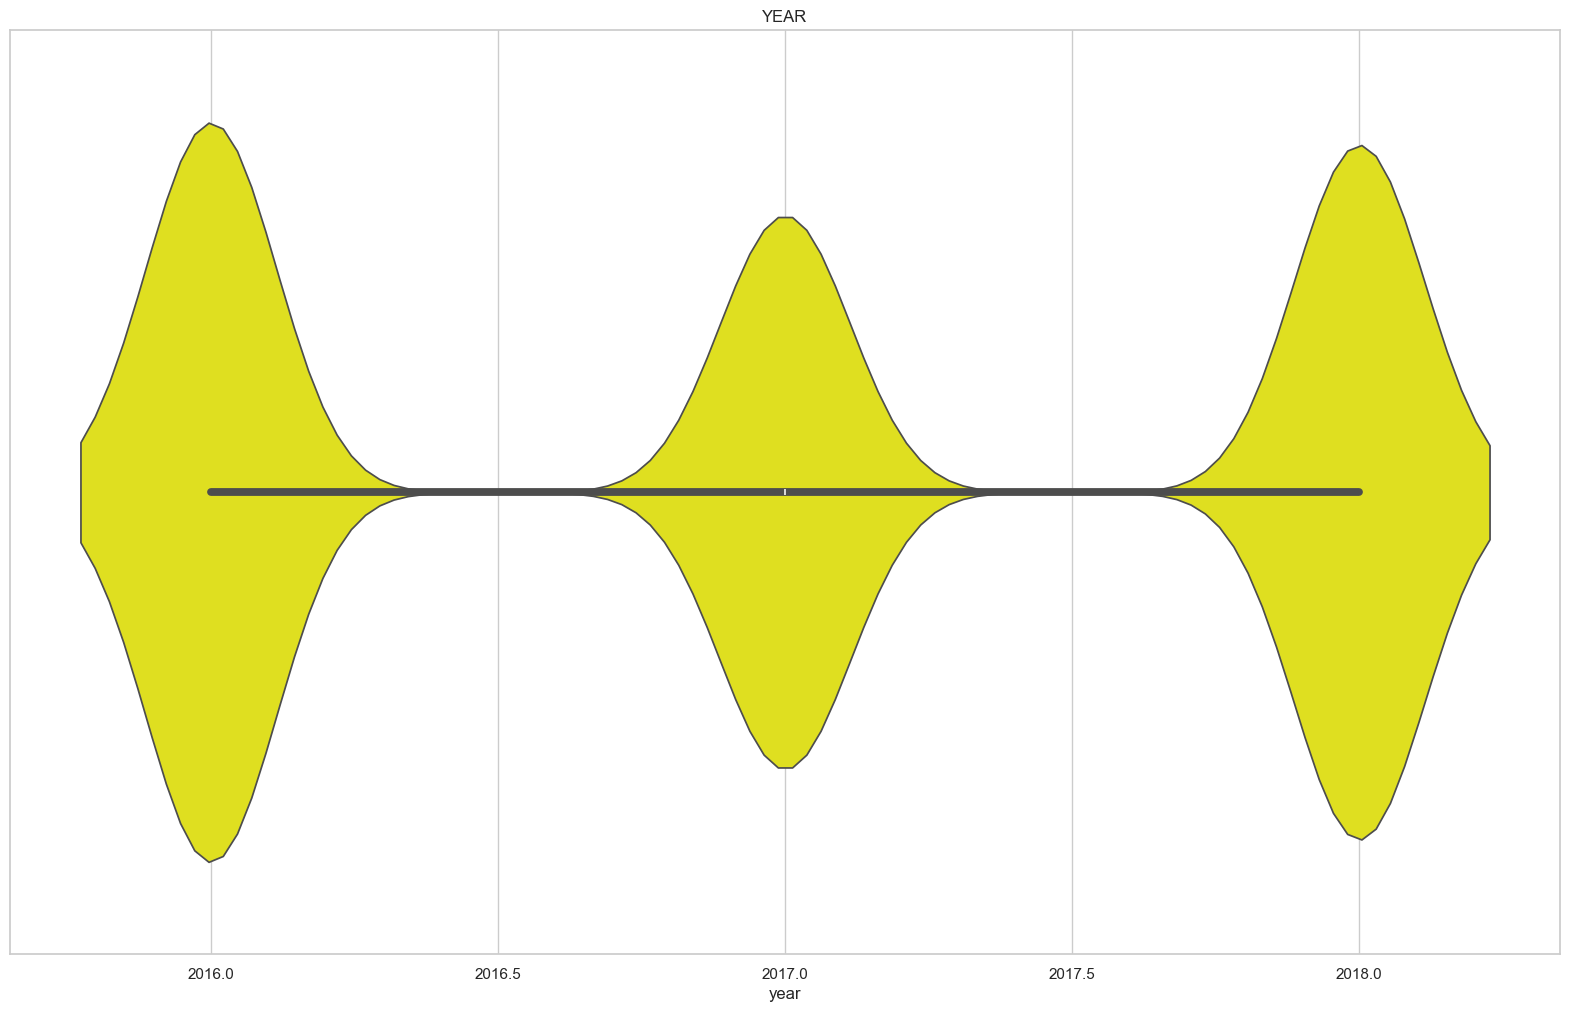

In [99]:
sns.violinplot(data = fanc, x = 'year', color = 'Yellow').set(title = 'YEAR');

[Text(0.5, 1.0, 'YEAR')]

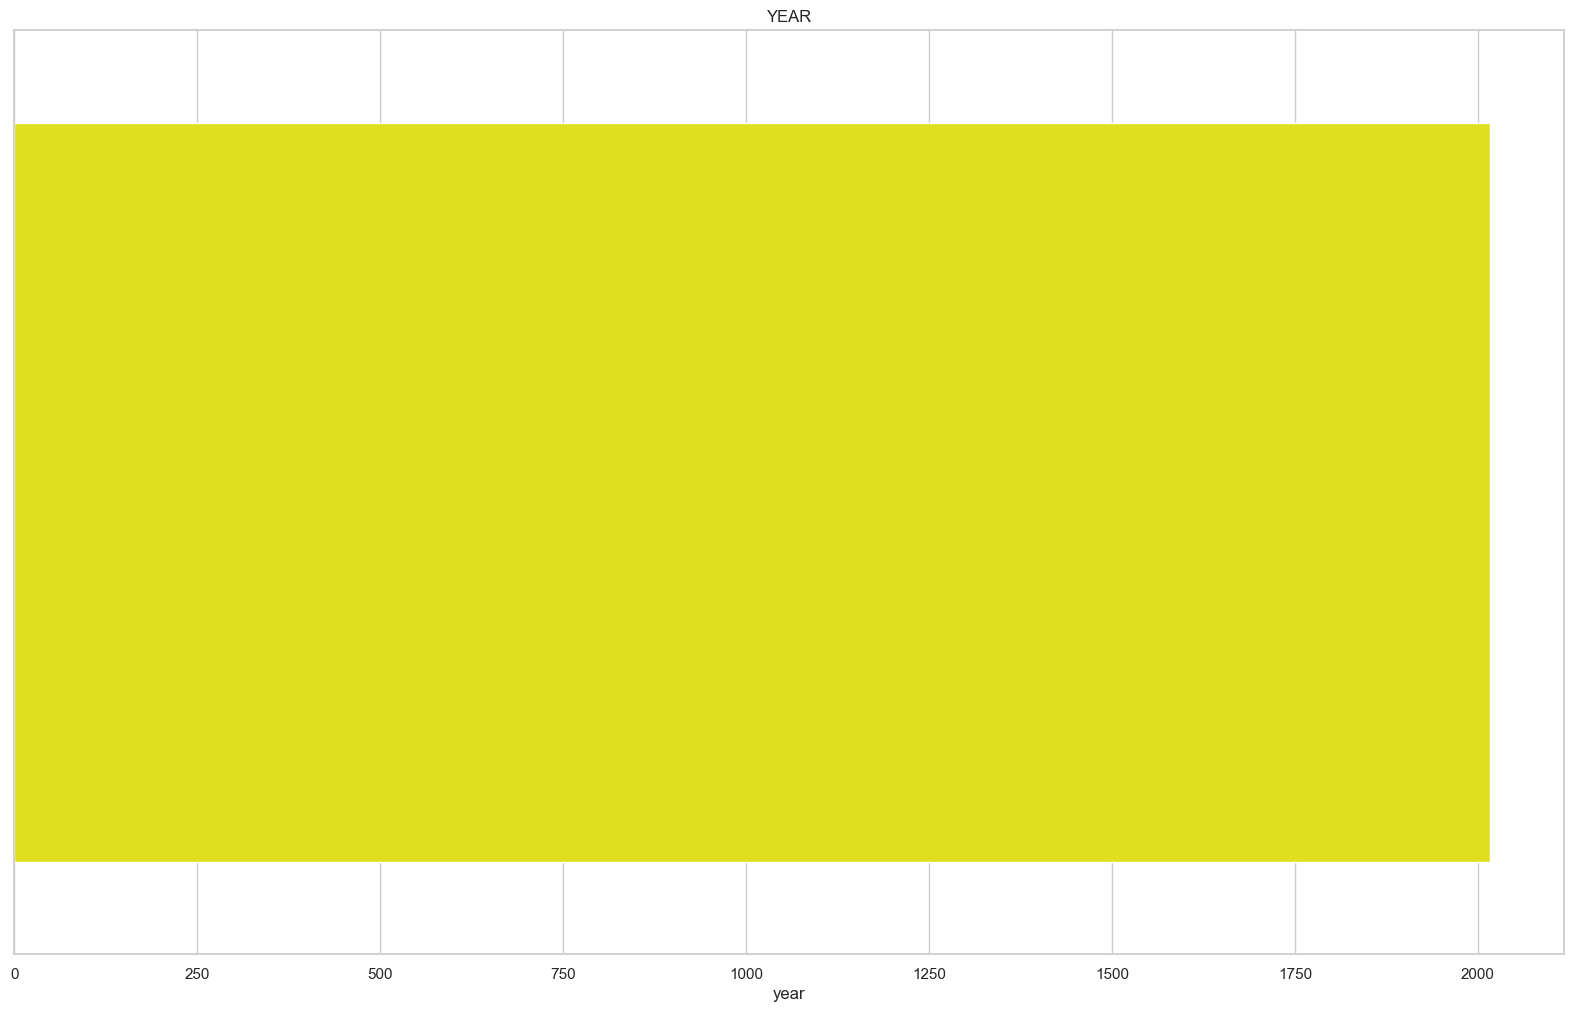

In [100]:
sns.barplot(data = fanc, x = 'year', color = 'Yellow').set(title = 'YEAR')

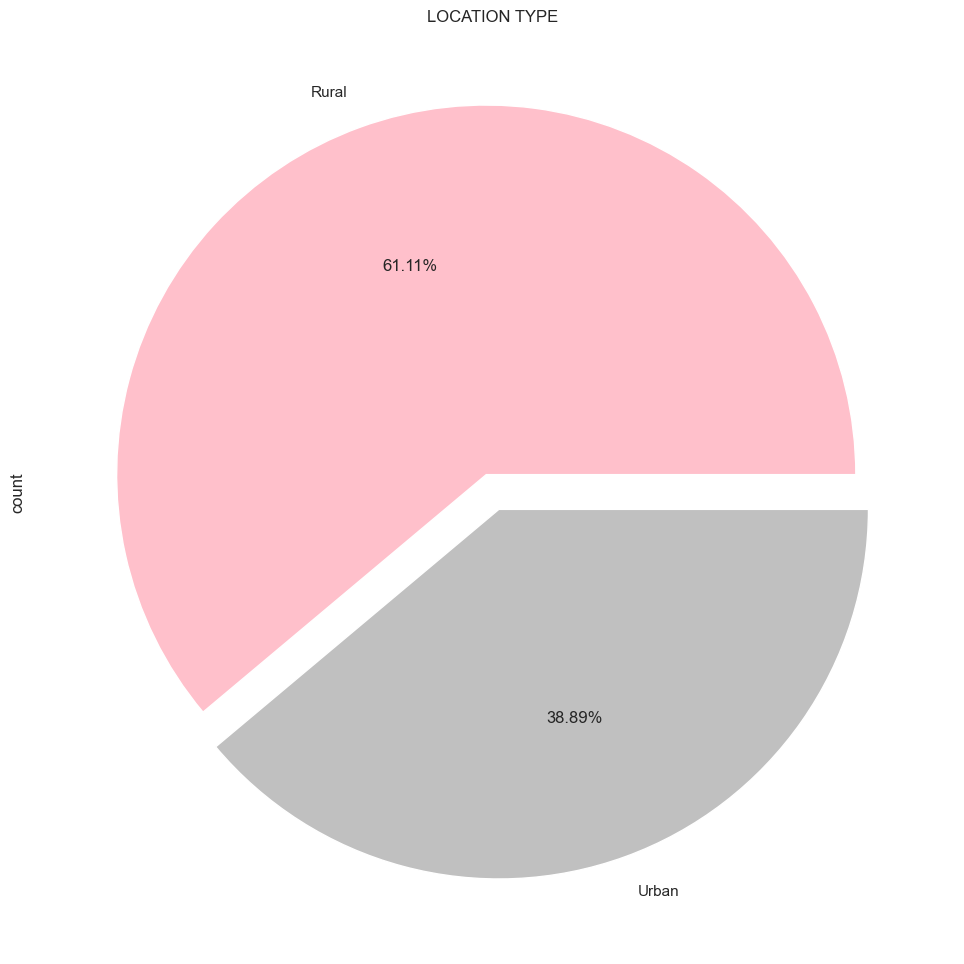

In [101]:
# defining data
data = fanc['type_of_location'].value_counts()

# plotting pie chart
data.plot.pie(autopct='%.2f%%', colors = ['pink', 'silver'], explode = (0.05, 0.05))

# define tittle
plt.title('LOCATION TYPE')

# displaying chart
plt.show()

[Text(0.5, 1.0, 'RELATIONSHIP WITH HEAD')]

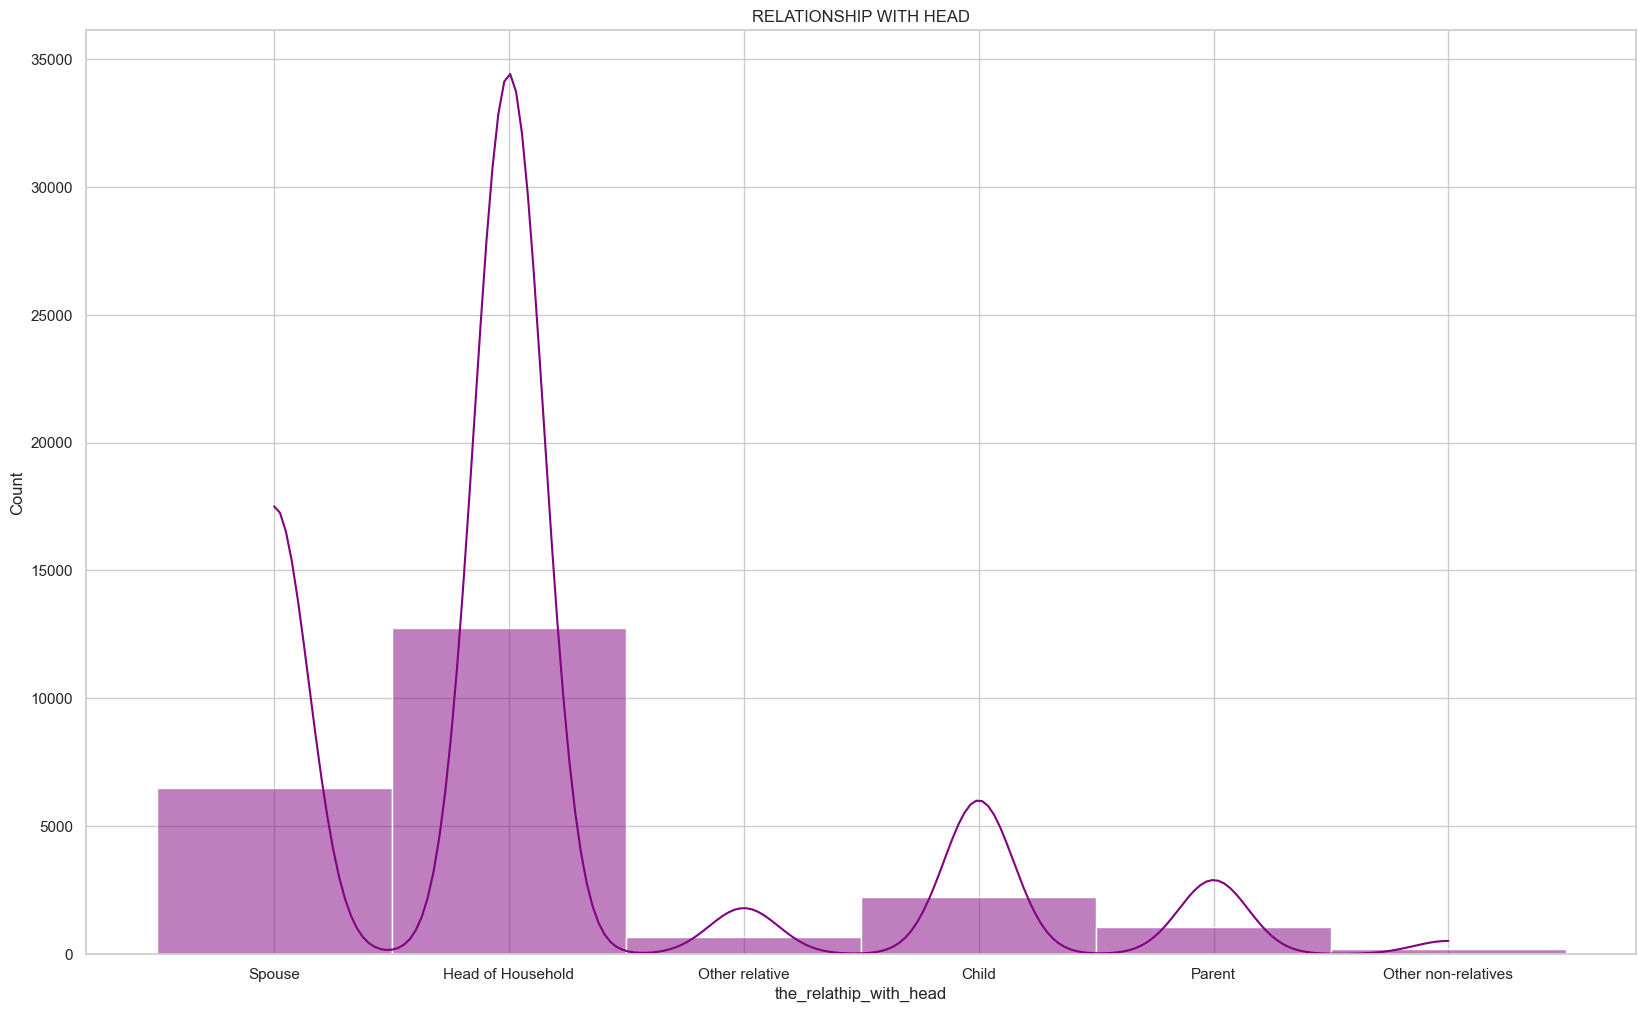

In [102]:
sns.histplot(data = fanc, x = 'the_relathip_with_head', bins = 20, kde = 'True', color = 'Purple').set(title = 'RELATIONSHIP WITH HEAD')

C:\Users\send2\AppData\Local\Temp\ipykernel_18104\897108703.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="day", y="total_bill", hue="sex",


<Axes: xlabel='day', ylabel='total_bill'>

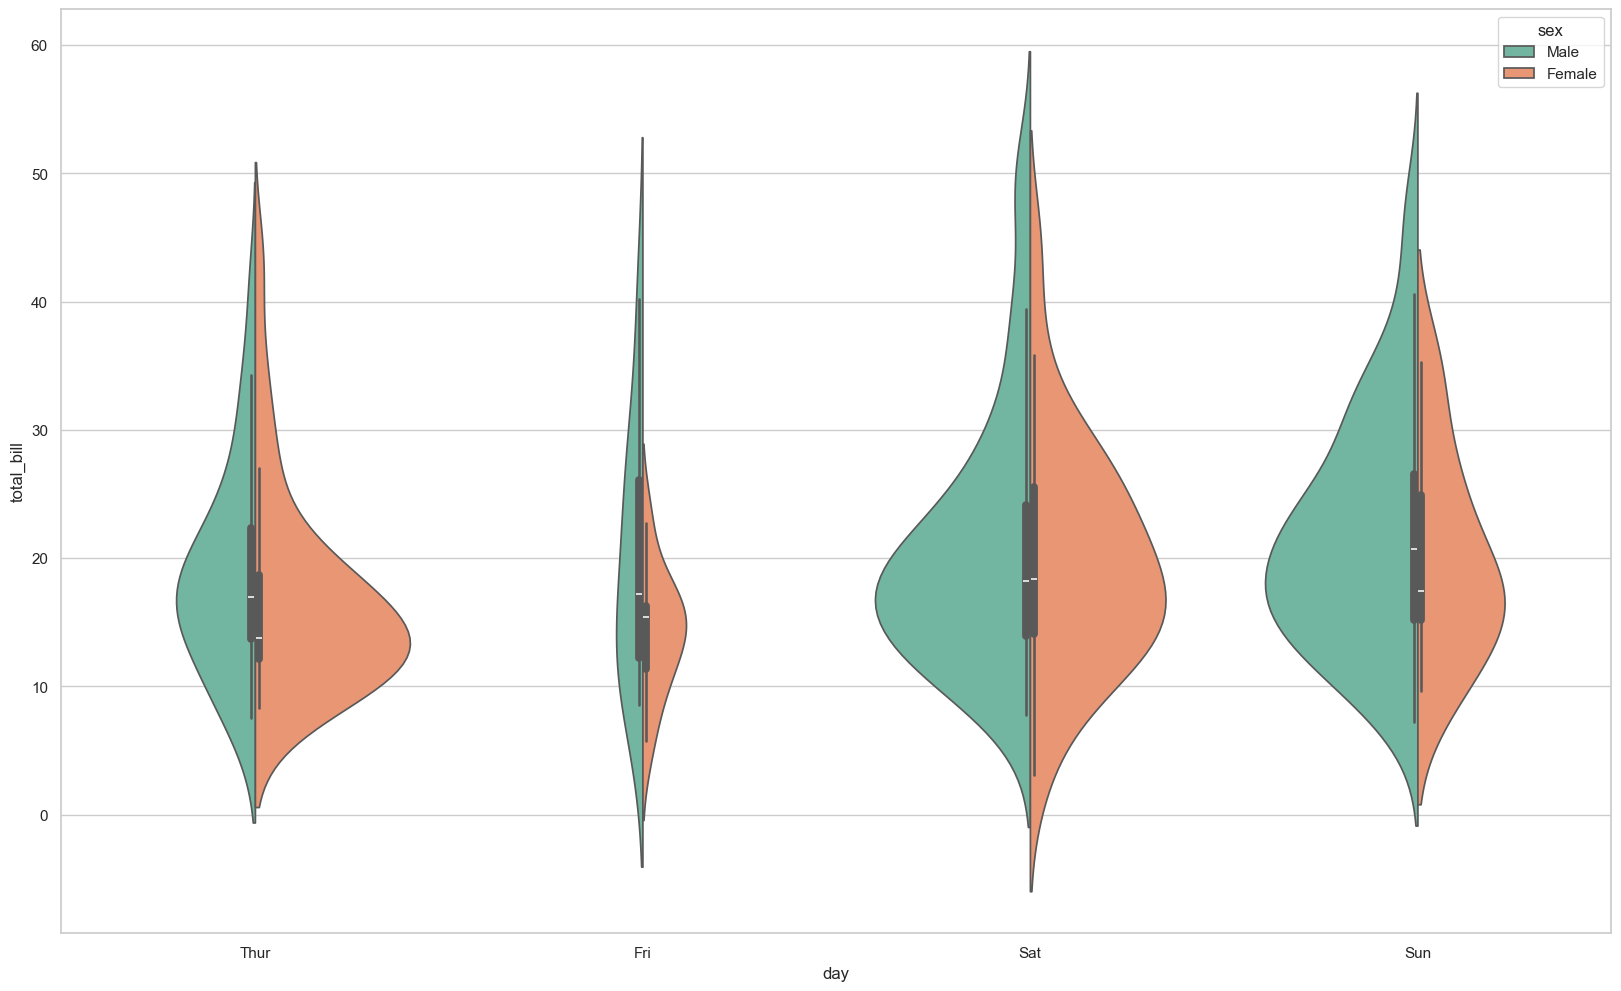

In [103]:
sns.violinplot(x="day", y="total_bill", hue="sex",
                    data=tip, palette="Set2", split=True,
                    scale="count")